In [39]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
# In terminal: pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

PCOS = pd.read_csv("PCOS.csv")

# Data Cleaning

PCOS (Y/N): Age (C), Weight(C), pulse rate (C), RR (C), BMI (C), Years of marriage (C), Pregnant (B), Fast Food (B), Regular Exercise (B), No. of abortions (C), cycle length (c), waist/hip ratio (C), hair growth (B), pimples (B), blood group (cat)


In [40]:
data = PCOS.loc[:, ["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "Pulse rate(bpm)", "RR (breaths/min)", "Marraige Status (Yrs)", 'Fast food (Y/N)', "Pregnant(Y/N)", "No. of aborptions", "Hip(inch)", "Waist(inch)", "Reg.Exercise(Y/N)", "Cycle(R/I)", "hair growth(Y/N)", "Pimples(Y/N)", "Blood Group"]]

# Organizing data
data["H/W Ratio"] = data["Hip(inch)"]/data["Waist(inch)"]
data["Height(M)"] = data["Height(Cm)"]/100
data["BMI"] = data["Weight (Kg)"]/np.square(data["Height(M)"])
data = data.reindex(columns=["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Pulse rate(bpm)", "RR (breaths/min)", "Marraige Status (Yrs)", 'Fast food (Y/N)', "Pregnant(Y/N)", "No. of aborptions", "H/W Ratio", "Reg.Exercise(Y/N)", "Cycle(R/I)", "hair growth(Y/N)", "Pimples(Y/N)", "Blood Group"])

In [41]:
# Adding in missing values with mean of other values
missing_cols = data.columns[data.isna().any()].tolist()
for x in missing_cols:
    data[x] = data[x].fillna(data[x].mean())

In [42]:
data.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Marraige Status (Yrs),Fast food (Y/N),Pregnant(Y/N),No. of aborptions,H/W Ratio,Reg.Exercise(Y/N),Cycle(R/I),hair growth(Y/N),Pimples(Y/N),Blood Group
0,0,28,44.6,152.0,19.304017,78,22,7.0,1.0,0,0,1.200000,0,2,0,0,15
1,0,36,65.0,161.5,24.921163,74,20,11.0,0.0,1,0,1.187500,0,2,0,0,15
2,1,33,68.8,165.0,25.270891,72,18,10.0,1.0,1,0,1.111111,0,2,0,1,11
3,0,37,65.0,148.0,29.674945,72,20,4.0,0.0,0,0,1.166667,0,2,0,0,13
4,0,25,52.0,161.0,20.060954,72,18,1.0,0.0,1,0,1.233333,0,2,0,0,11


# Use SMOTE to generate more values

In [43]:
data["PCOS (Y/N)"].value_counts()

0    364
1    177
Name: PCOS (Y/N), dtype: int64

In [44]:
X=data.iloc[:,1:]
X.isnull().sum()
y=data.iloc[:,0]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [45]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 142
Before OverSampling, counts of label '0': 290 

After OverSampling, the shape of train_X: (580, 16)
After OverSampling, the shape of train_y: (580,) 

After OverSampling, counts of label '1': 290
After OverSampling, counts of label '0': 290


In [46]:
y = pd.DataFrame(y_train_res, columns=["PCOS (Y/N)"])

In [47]:
data = pd.concat([X_train_res, y], axis = 1) 
data = data.reindex(columns=["PCOS (Y/N)", "Age (yrs)", "Weight (Kg)", "Height(Cm)", "BMI", "Pulse rate(bpm)", "RR (breaths/min)", "Marraige Status (Yrs)", 'Fast food (Y/N)', "Pregnant(Y/N)", "No. of aborptions", "H/W Ratio", "Reg.Exercise(Y/N)", "Cycle(R/I)", "hair growth(Y/N)", "Pimples(Y/N)", "Blood Group"])
data = data.rename(columns={"PCOS (Y/N)":"PCOS", "Age (yrs)":"age", "Weight (Kg)": "weight", "Height(Cm)": "height", "Pulse rate(bpm)": "pulse_rate", "RR (breaths/min)": "RR", "Marraige Status (Yrs)": "marriage_years", 'Fast food (Y/N)': "fast_food", "Pregnant(Y/N)": "pregnant", "No. of aborptions": "number_abortions", "H/W Ratio": "h/w_ratio", "Reg.Exercise(Y/N)": "regular_excercise", "Cycle(R/I)": "cycle", "hair growth(Y/N)": "hair_growth", "Pimples(Y/N)": "pimples"})
data.head()


,PCOS,age,weight,height,BMI,pulse_rate,RR,marriage_years,fast_food,pregnant,number_abortions,h/w_ratio,regular_excercise,cycle,hair_growth,pimples,Blood Group
0,0,33,58.5,159.000,23.139907,72,20,13.0,0.0,1,2,1.157895,0,2,0,0,13
1,1,27,50.0,168.000,17.715420,72,18,7.0,0.0,0,0,1.040000,0,4,1,1,13
2,0,38,70.0,164.592,25.839291,72,18,8.0,0.0,0,0,1.095238,0,2,1,1,16
3,0,34,60.0,156.000,24.654832,74,20,7.0,0.0,0,0,1.218750,0,2,0,0,14
4,1,31,50.0,158.000,20.028842,74,20,11.0,1.0,0,0,1.200000,1,2,0,1,11


In [48]:
data.shape

(580, 17)

### Changing Blood Group into categories

In [49]:
blood_group_map = {11: "A+", 12: "A-", 13: "B+", 14: "B-", 15: "O+", 16: "O-", 17: "AB+", 18: "AB-"}

data.loc[:, "blood_group_cat"] = data.loc[:, "Blood Group"].map(blood_group_map)
data.head()

,PCOS,age,weight,height,BMI,pulse_rate,RR,marriage_years,fast_food,pregnant,number_abortions,h/w_ratio,regular_excercise,cycle,hair_growth,pimples,Blood Group,blood_group_cat
0,0,33,58.5,159.000,23.139907,72,20,13.0,0.0,1,2,1.157895,0,2,0,0,13,B+
1,1,27,50.0,168.000,17.715420,72,18,7.0,0.0,0,0,1.040000,0,4,1,1,13,B+
2,0,38,70.0,164.592,25.839291,72,18,8.0,0.0,0,0,1.095238,0,2,1,1,16,O-
3,0,34,60.0,156.000,24.654832,74,20,7.0,0.0,0,0,1.218750,0,2,0,0,14,B-
4,1,31,50.0,158.000,20.028842,74,20,11.0,1.0,0,0,1.200000,1,2,0,1,11,A+


# EDA

### Testing if age needs transformation

<AxesSubplot:xlabel='PCOS', ylabel='age'>

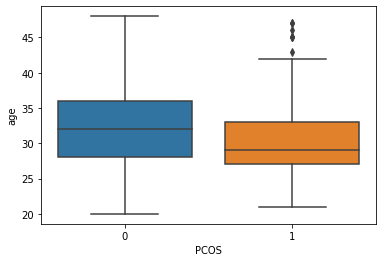

In [50]:
sns.boxplot(x = 'PCOS', y = 'age', data = data)

In [51]:
#Binning Age
binned_age = pd.qcut(data['age'], 10, retbins=True)
data['age_binned'] = binned_age[0]

In [52]:
#Finding percentage of people having diabetes in each Age bin
age_data = data.groupby('age_binned')['PCOS'].agg([('PCOS_percent','mean'),('nobs','count')]).reset_index(drop=False)
age_data

,age_binned,PCOS_percent,nobs
0,"(19.999, 25.0]",0.662500,80
1,"(25.0, 27.0]",0.507042,71
2,"(27.0, 28.0]",0.630435,46
3,"(28.0, 29.0]",0.697674,43
4,"(29.0, 31.0]",0.568182,88
5,"(31.0, 32.0]",0.363636,44
6,"(32.0, 34.0]",0.462963,54
7,"(34.0, 35.0]",0.410256,39
8,"(35.0, 38.0]",0.328358,67
9,"(38.0, 48.0]",0.270833,48


Text(0.5, 0, 'Age_bin')

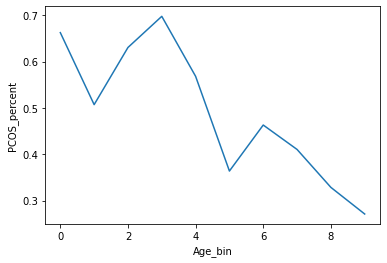

In [53]:
sns.lineplot(x = age_data.index, y = age_data['PCOS_percent'])
plt.xlabel('Age_bin')

We observe that the probability of people having PCOS does not keep decreasing monotonically with age. However, it is still relatively linear, so we do not need to perform a transformation.

### Testing if weight needs transformation

<AxesSubplot:xlabel='PCOS', ylabel='weight'>

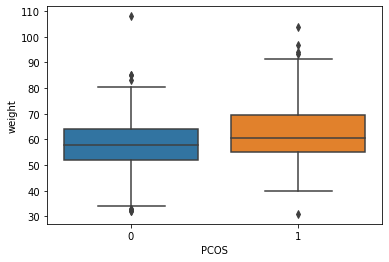

In [54]:
sns.boxplot(x = 'PCOS', y = 'weight', data = data)

In [55]:
#Binning weight
binned_weight = pd.qcut(data['weight'], 6, retbins=True)
data['weight_binned'] = binned_weight[0]

In [56]:
#Finding percentage of people having diabetes in each Age bin
weight_data = data.groupby('weight_binned')['PCOS'].agg([('PCOS_percent','mean'),('nobs','count')]).reset_index(drop=False)
weight_data

,weight_binned,PCOS_percent,nobs
0,"(30.999, 50.562]",0.319588,97
1,"(50.562, 55.0]",0.471154,104
2,"(55.0, 59.951]",0.573034,89
3,"(59.951, 64.0]",0.415094,106
4,"(64.0, 70.587]",0.563218,87
5,"(70.587, 108.0]",0.680412,97


Text(0.5, 0, 'Weight_bin')

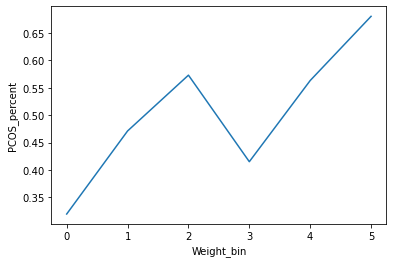

In [57]:
sns.lineplot(x = weight_data.index, y = weight_data['PCOS_percent'])
plt.xlabel('Weight_bin')

### Identifying Highly Correlated Predictors (with PCOS)

In [455]:
data.corrwith(data.PCOS).sort_values()

age                 -0.205822
pregnant            -0.124902
number_abortions    -0.093737
marriage_years      -0.085092
RR                  -0.009940
regular_excercise    0.020616
h/w_ratio            0.035228
height               0.052479
Blood Group          0.056213
pulse_rate           0.076561
pimples              0.158863
weight               0.214162
BMI                  0.214597
cycle                0.360795
hair_growth          0.364386
fast_food            0.392800
PCOS                 1.000000
dtype: float64

### Pairplot

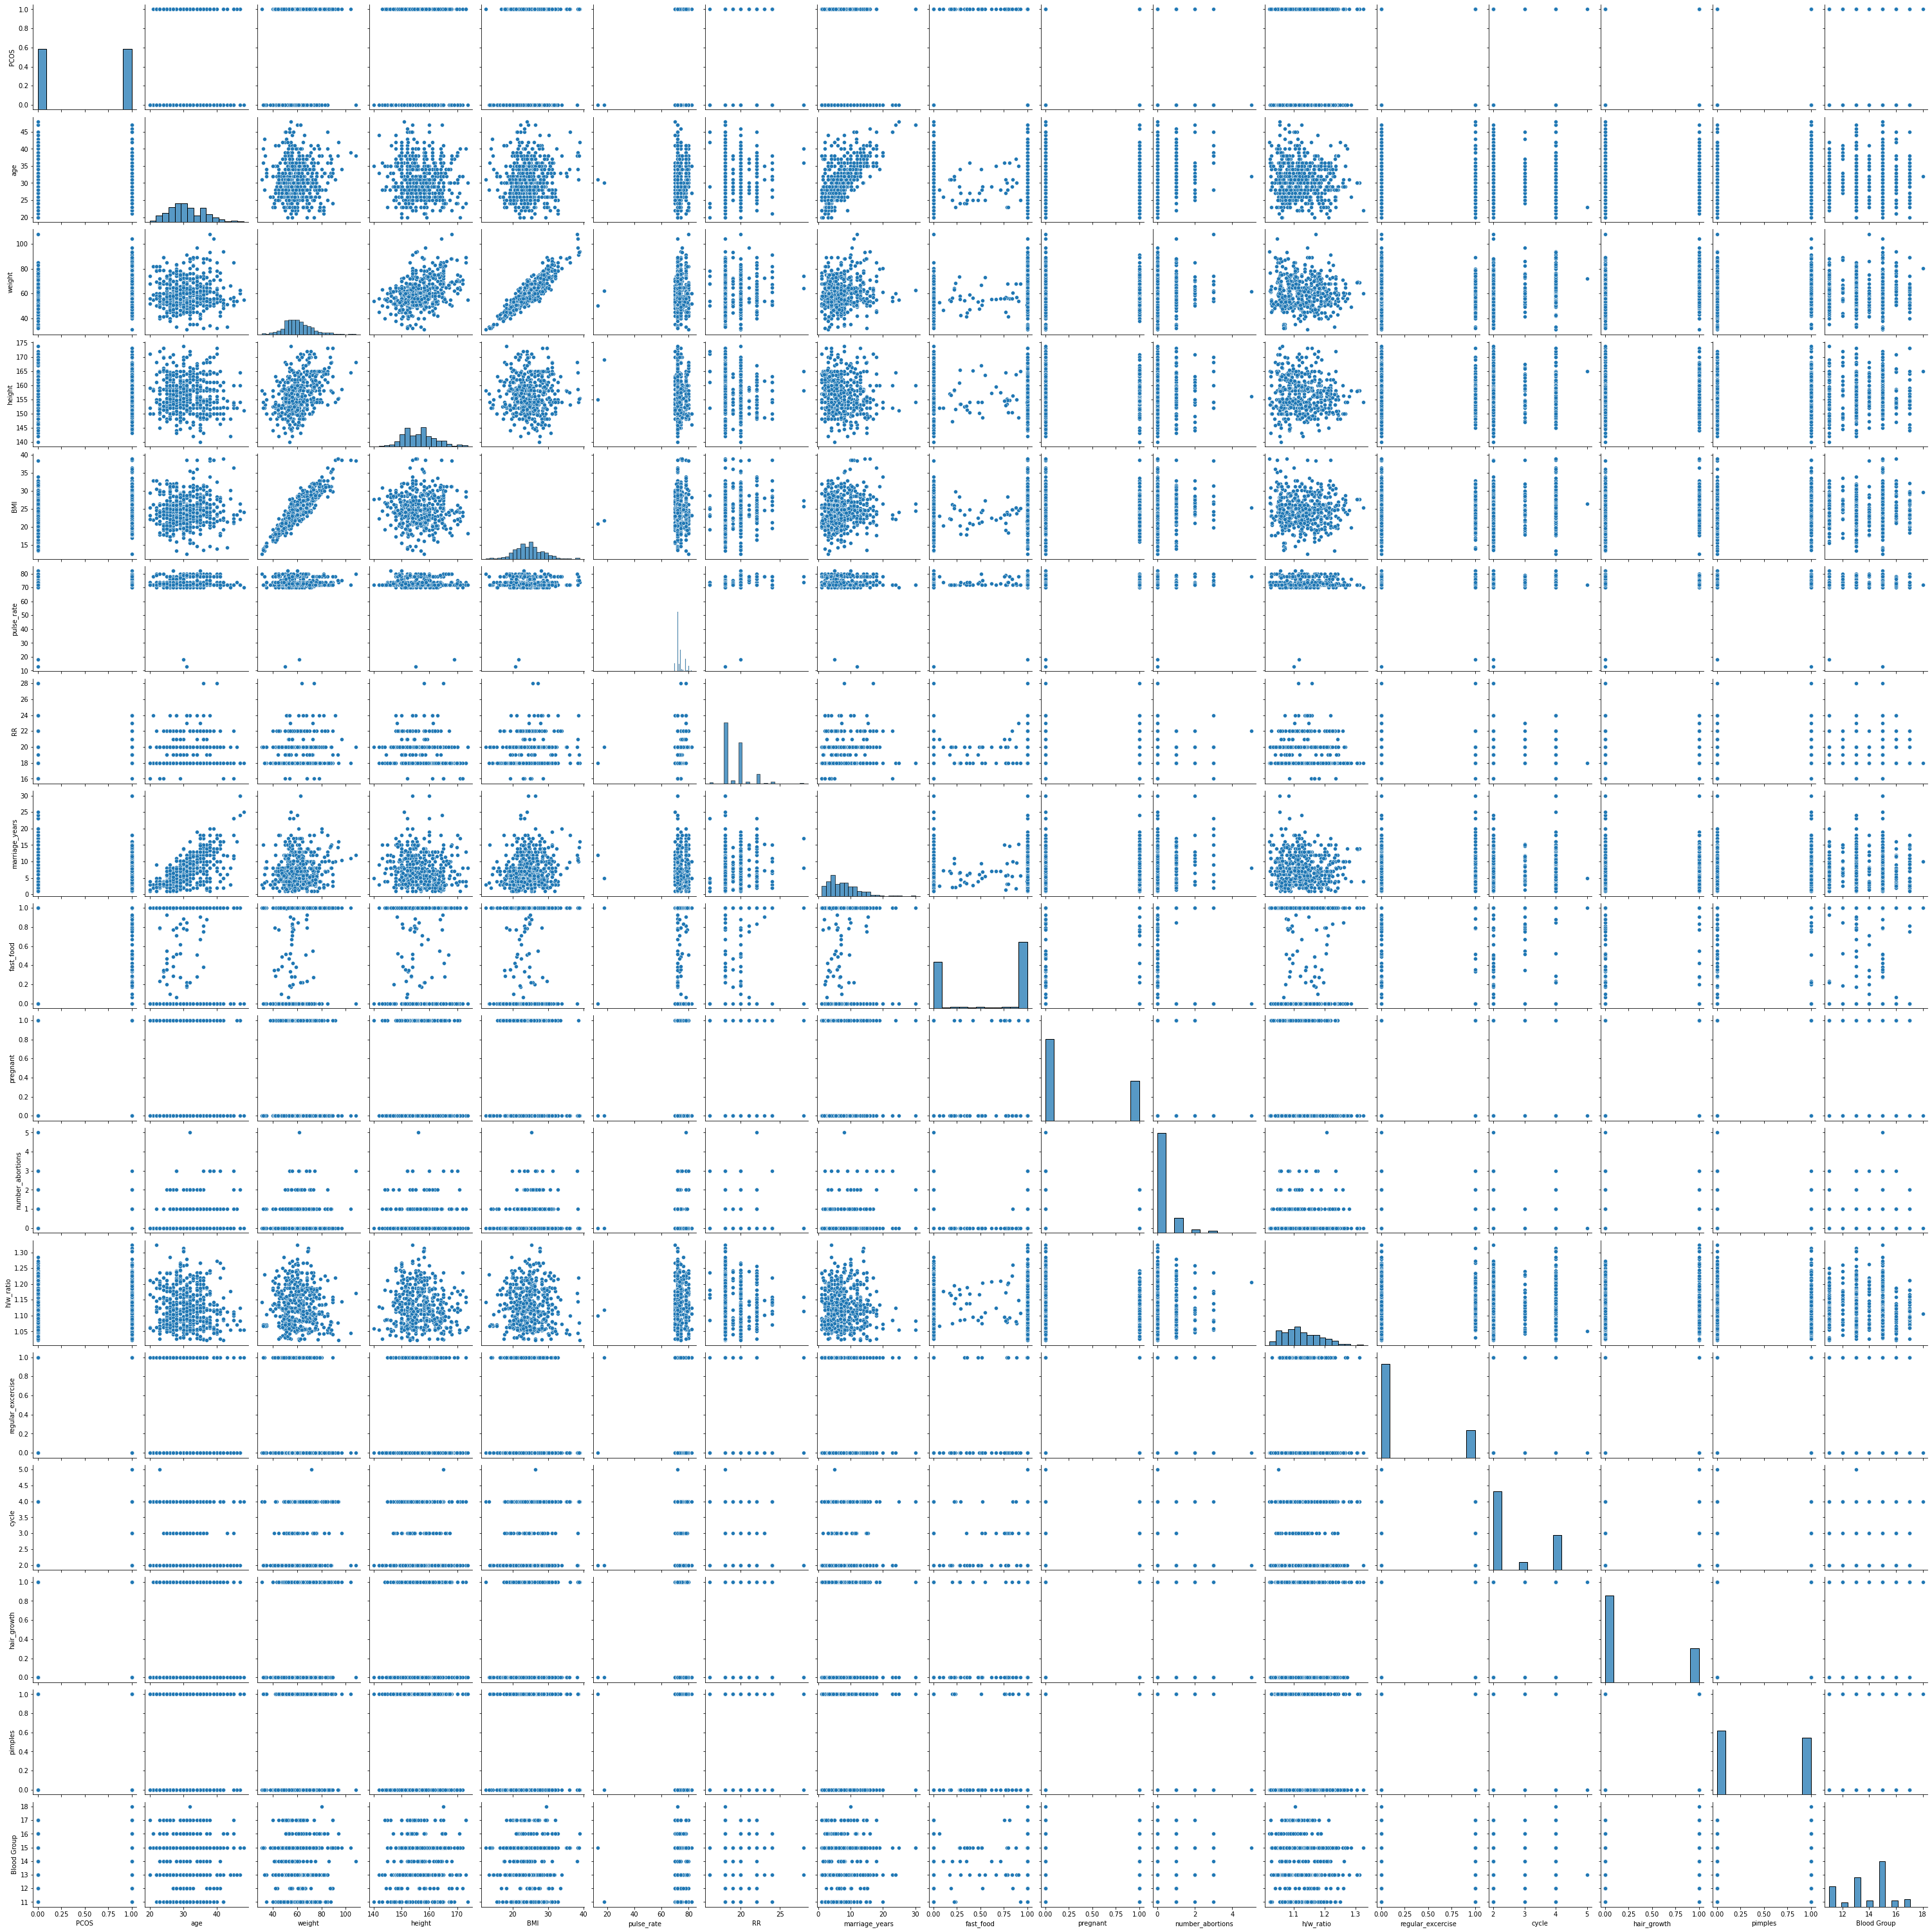

In [456]:
sns.pairplot(data)

**Observations: (CHECK THESE + transform variables based on findings)**

**Weight and BMI seem to have a linear relationship.**

**Age and marriage years have a slightly linear relationship.**

**Pulse rate seems to have outliers below around 70.**

**There are three Blood Groups with high frequencies.**

**The distribution for the number of abortions could potentially be exponential (downward).**

**There are two RRs with high frequencies.**

# Logistic Regression

## Examining Distribution of Target (PCOS)

In [78]:
data.PCOS.value_counts()

0    290
1    290
Name: PCOS, dtype: int64

**Our target ('PCOS') is balanced.**

<AxesSubplot:xlabel='PCOS', ylabel='count'>

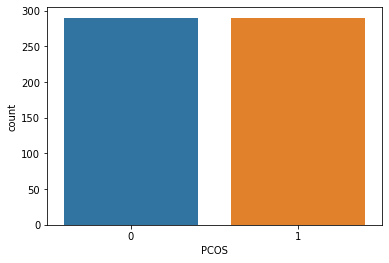

In [79]:
sns.countplot(x = 'PCOS', data = data)

## Logistic Model for Weight

In [275]:
model1 = smf.logit('PCOS~weight', data = data).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.669478
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      578
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                 0.03415
Time:                        17:19:05   Log-Likelihood:                -388.30
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 1.607e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4610      0.497     -4.951      0.000      -3.435      -1.487
weight         0.0409      0.008      5.011      0.000       0.025       0.057
==============================================================================
"""

**For a unit increase in weight, the log odds of PCOS increase by 0.0409, or the odds of PCOS get multiplied by exp(0.0409) = 1.042**

**Assuming a significance level of 5%, weight is associated with the probability of having PCOS, as the p-value for weight is near 0 (and 0 < 0.05).**

<AxesSubplot:xlabel='weight', ylabel='PCOS'>

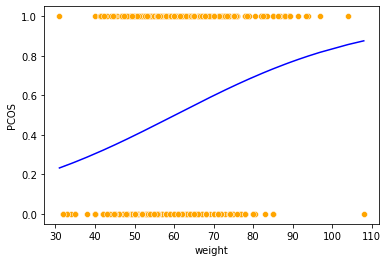

In [276]:
sns.scatterplot(x = 'weight', y = 'PCOS', data = data, color = 'orange') #Visualizing data
sns.lineplot(x = 'weight', y= model1.predict(data), data = data, color = 'blue') #Visualizing model

Classification accuracy = 56.0%


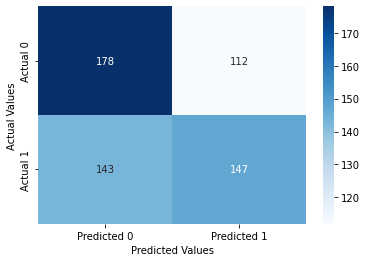

In [106]:
#Function to compute confusion matrix and prediction accuracy on training data
def confusion_matrix_train(model,cutoff=0.5):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    
confusion_matrix_train(model1)

**True negatives = 178 were correctly classified as not having PCOS.**

**False positives = 112 were wrongly classified as having PCOS (but do not have PCOS).**

**False negatives = 143 were incorrectly classified as not having PCOS (but have PCOS).**

**True positives = 147 were correctly classified as having PCOS.**

**Trying to use the binned version of weight:**

In [111]:
model1 = smf.logit('PCOS~weight_binned', data = data).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.665083
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      574
Method:                           MLE   Df Model:                            5
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                 0.04049
Time:                        16:45:57   Log-Likelihood:                -385.75
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 4.613e-06
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   -0.7557      0.218     -3.471      0.001      -1.182      -0.329
weight_binned[T.Interval(50.562, 55.0, closed='right')]      0.6402      0.293      2.183      0.029       0.065       1.215
weight_binned[T.Interval(55.0, 59.951, closed='right')]      1.0499      0.306      3.437      0.001       0.451       1.649
weight_binned[T.Interval(59.951, 64.0, closed='right')]      0.4127      0.294      1.405      0.160      -0.163       0.988
weight_binned[T.Interval(64.0, 70.587, closed='right')]      1.0099      0.307      3.292      0.001       0.409       1.611
weight_binned[T.Interval(70.587, 108.0, closed='right')]     1.5113      0.308      4.908      0.000       0.908       2.115
============================================================================================================================
"""

Classification accuracy = 60.2%


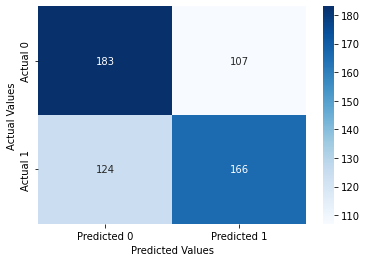

In [112]:
confusion_matrix_train(model1)

**Accuracy increases when using the binned version of weight by about 4%.**

## Logistic Model for Age

In [279]:
model2 = smf.logit('PCOS~age', data = data).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.671500
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      578
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                 0.03123
Time:                        17:19:29   Log-Likelihood:                -389.47
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 5.412e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5525      0.532      4.801      0.000       1.510       3.594
age           -0.0821      0.017     -4.854      0.000      -0.115      -0.049
==============================================================================
"""

**For a unit increase in age, the log odds of PCOS decrease by 0.0821, or the odds of PCOS get multiplied by exp(0.0821) = 0.921**

**Assuming a significance level of 5%, age is associated with the probability of having PCOS, as the p-value for age is near 0 (and 0 < 0.05).**

<AxesSubplot:xlabel='age', ylabel='PCOS'>

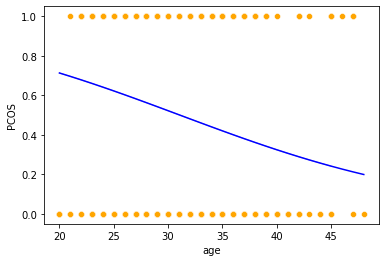

In [280]:
sns.scatterplot(x = 'age', y = 'PCOS', data = data, color = 'orange') #Visualizing data
sns.lineplot(x = 'age', y= model2.predict(data), data = data, color = 'blue') #Visualizing model

Classification accuracy = 61.7%


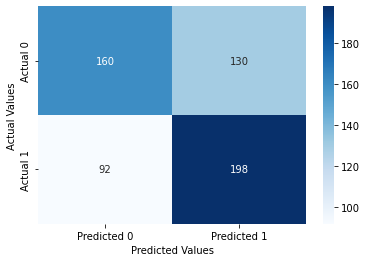

In [281]:
confusion_matrix_train(model2)

**True negatives = 160 were correctly classified as not having PCOS.**

**False positives = 130 were wrongly classified as having PCOS (but do not have PCOS).**

**False negatives = 92 were incorrectly classified as not having PCOS (but have PCOS).**

**True positives = 198 were correctly classified as having PCOS.**

**Now try with binned version of age:**

In [282]:
model2 = smf.logit('PCOS~age_binned', data = data).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.655442
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      570
Method:                           MLE   Df Model:                            9
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                 0.05440
Time:                        17:19:36   Log-Likelihood:                -380.16
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 1.577e-06
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              0.6745      0.236      2.853      0.004       0.211       1.138
age_binned[T.Interval(25.0, 27.0, closed='right')]    -0.6463      0.335     -1.929      0.054      -1.303       0.010
age_binned[T.Interval(27.0, 28.0, closed='right')]    -0.1404      0.386     -0.363      0.716      -0.897       0.617
age_binned[T.Interval(28.0, 29.0, closed='right')]     0.1618      0.408      0.397      0.691      -0.637       0.961
age_binned[T.Interval(29.0, 31.0, closed='right')]    -0.4000      0.320     -1.251      0.211      -1.027       0.227
age_binned[T.Interval(31.0, 32.0, closed='right')]    -1.2341      0.393     -3.143      0.002      -2.004      -0.465
age_binned[T.Interval(32.0, 34.0, closed='right')]    -0.8229      0.361     -2.279      0.023      -1.531      -0.115
age_binned[T.Interval(34.0, 35.0, closed='right')]    -1.0374      0.402     -2.578      0.010      -1.826      -0.249
age_binned[T.Interval(35.0, 38.0, closed='right')]    -1.3901      0.352     -3.954      0.000      -2.079      -0.701
age_binned[T.Interval(38.0, 48.0, closed='right')]    -1.6649      0.402     -4.144      0.000      -2.452      -0.877
======================================================================================================================
"""

Classification accuracy = 61.7%


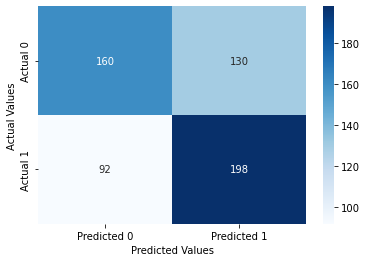

In [283]:
confusion_matrix_train(model2)

**Try cubic transformation of age:**

Optimization terminated successfully.
         Current function value: 0.661187
         Iterations 5


-383.48856705639423

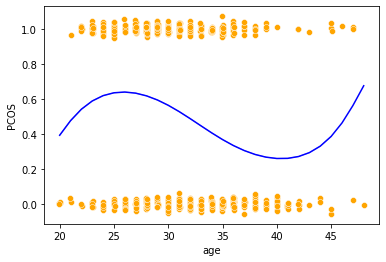

In [344]:
#Model with the cubic transformation of age
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(data.age,0), y = jitter(data.PCOS,0), data = data, color = 'orange')
model2_cubic = smf.logit(formula = 'PCOS~age+I(age**2)+I(age**3)', data = data).fit()
sns.lineplot(x = 'age', y= model2_cubic.predict(data), data = data, color = 'blue') 
model2_cubic.llf

Classification accuracy = 62.6%


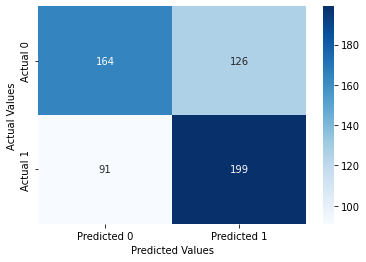

In [340]:
confusion_matrix_train(model2_cubic)

**Accuracy stays the exact same with age v. binned age.**

## Logistic Model for BMI

In [289]:
model3 = smf.logit('PCOS~BMI', data = data).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.669381
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      578
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                 0.03429
Time:                        17:21:25   Log-Likelihood:                -388.24
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 1.516e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7835      0.560     -4.969      0.000      -3.882      -1.686
BMI            0.1132      0.023      5.019      0.000       0.069       0.157
==============================================================================
"""

**For a unit increase in BMI, the log odds of PCOS increase by 0.1132, or the odds of PCOS get multiplied by exp(0.1132) = 1.120**

**Assuming a significance level of 5%, BMI is associated with the probability of having PCOS, as the p-value for BMI is near 0 (and 0 < 0.05).**

<AxesSubplot:xlabel='BMI', ylabel='PCOS'>

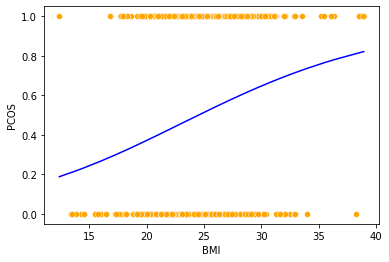

In [285]:
sns.scatterplot(x = 'BMI', y = 'PCOS', data = data, color = 'orange') #Visualizing data
sns.lineplot(x = 'BMI', y= model3.predict(data), data = data, color = 'blue') #Visualizing model

Classification accuracy = 57.6%


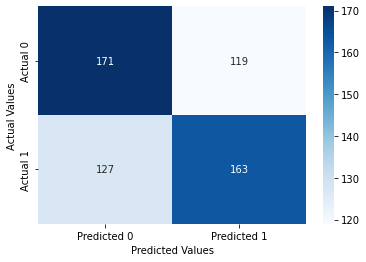

In [293]:
confusion_matrix_train(model3)

**True negatives = 171 were correctly classified as not having PCOS.**

**False positives = 119 were wrongly classified as having PCOS (but do not have PCOS).**

**False negatives = 127 were incorrectly classified as not having PCOS (but have PCOS).**

**True positives = 163 were correctly classified as having PCOS.**

**Try a cubic transformation of BMI:**

Optimization terminated successfully.
         Current function value: 0.669007
         Iterations 6


-388.02417131846516

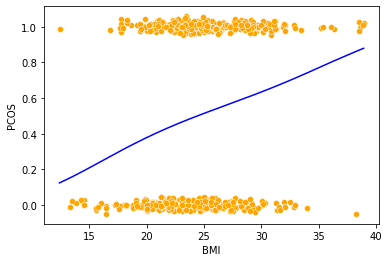

In [330]:
#Model with the cubic transformation of BMI
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(data.BMI,0), y = jitter(data.PCOS,0), data = data, color = 'orange')
model3_quad = smf.logit(formula = 'PCOS~BMI+I(BMI**2)+I(BMI**3)', data = data).fit()
sns.lineplot(x = 'BMI', y= model3_quad.predict(data), data = data, color = 'blue') 
model3_quad.llf

Classification accuracy = 58.4%


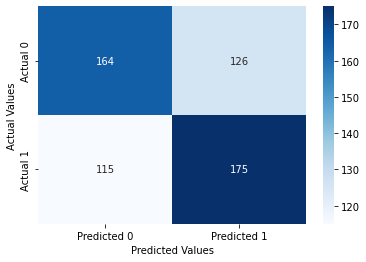

In [331]:
confusion_matrix_train(model3_quad)

**Accuracy slightly increases with a cubic tranformation of BMI**

## Logistic Model with Binned Weight, Age, and BMI

In [307]:
model4 = smf.logit(formula = 'PCOS~age_binned+weight_binned+BMI', data = data).fit()
model4.summary()

Optimization terminated successfully.
         Current function value: 0.621432
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      564
Method:                           MLE   Df Model:                           15
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.1035
Time:                        17:24:58   Log-Likelihood:                -360.43
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 1.815e-11
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   -2.6081      0.931     -2.801      0.005      -4.433      -0.783
age_binned[T.Interval(25.0, 27.0, closed='right')]          -0.5216      0.349     -1.496      0.135      -1.205       0.162
age_binned[T.Interval(27.0, 28.0, closed='right')]          -0.1577      0.403     -0.391      0.696      -0.947       0.632
age_binned[T.Interval(28.0, 29.0, closed='right')]           0.1155      0.422      0.274      0.784      -0.711       0.942
age_binned[T.Interval(29.0, 31.0, closed='right')]          -0.2381      0.334     -0.714      0.475      -0.892       0.416
age_binned[T.Interval(31.0, 32.0, closed='right')]          -1.0335      0.415     -2.492      0.013      -1.846      -0.221
age_binned[T.Interval(32.0, 34.0, closed='right')]          -0.8750      0.379     -2.307      0.021      -1.618      -0.132
age_binned[T.Interval(34.0, 35.0, closed='right')]          -1.0124      0.421     -2.407      0.016      -1.837      -0.188
age_binned[T.Interval(35.0, 38.0, closed='right')]          -1.5612      0.368     -4.239      0.000      -2.283      -0.839
age_binned[T.Interval(38.0, 48.0, closed='right')]          -1.7597      0.424     -4.154      0.000      -2.590      -0.929
weight_binned[T.Interval(50.562, 55.0, closed='right')]      0.3554      0.331      1.073      0.283      -0.294       1.005
weight_binned[T.Interval(55.0, 59.951, closed='right')]      0.5969      0.368      1.620      0.105      -0.125       1.319
weight_binned[T.Interval(59.951, 64.0, closed='right')]     -0.1656      0.402     -0.412      0.681      -0.954       0.623
weight_binned[T.Interval(64.0, 70.587, closed='right')]      0.2464      0.440      0.560      0.575      -0.615       1.108
weight_binned[T.Interval(70.587, 108.0, closed='right')]     0.2782      0.575      0.484      0.628      -0.849       1.405
BMI                                                          0.1240      0.045      2.748      0.006       0.036       0.212
============================================================================================================================
"""

Classification accuracy = 63.8%


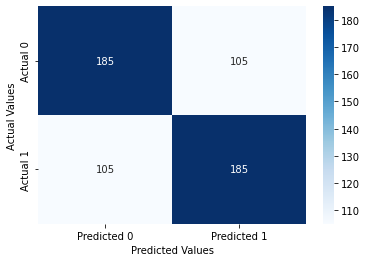

In [306]:
confusion_matrix_train(model4)

**Accuracy didn't improve much, still low at 63.8%**

### Same model but with cubic transformation on Age and BMI

In [355]:
model4_cubic = smf.logit(formula = 'PCOS~age+I(age**2)+I(age**3)+weight_binned+BMI+I(BMI**2)+I(BMI**3)', data = data).fit()
model4_cubic.summary()

Optimization terminated successfully.
         Current function value: 0.621447
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                           11
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.1034
Time:                        17:37:11   Log-Likelihood:                -360.44
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 3.582e-13
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -50.8549     14.589     -3.486      0.000     -79.449     -22.261
weight_binned[T.Interval(50.562, 55.0, closed='right')]      0.4449      0.358      1.242      0.214      -0.257       1.147
weight_binned[T.Interval(55.0, 59.951, closed='right')]      0.7178      0.406      1.767      0.077      -0.079       1.514
weight_binned[T.Interval(59.951, 64.0, closed='right')]     -0.1067      0.443     -0.241      0.810      -0.975       0.762
weight_binned[T.Interval(64.0, 70.587, closed='right')]      0.3686      0.486      0.758      0.448      -0.584       1.321
weight_binned[T.Interval(70.587, 108.0, closed='right')]     0.4549      0.600      0.758      0.448      -0.721       1.630
age                                                          4.3337      1.049      4.132      0.000       2.278       6.389
I(age ** 2)                                                 -0.1356      0.032     -4.221      0.000      -0.199      -0.073
I(age ** 3)                                                  0.0014      0.000      4.203      0.000       0.001       0.002
BMI                                                          0.5779      1.105      0.523      0.601      -1.588       2.743
I(BMI ** 2)                                                 -0.0192      0.043     -0.448      0.654      -0.103       0.065
I(BMI ** 3)                                                  0.0003      0.001      0.481      0.631      -0.001       0.001
============================================================================================================================
"""

Classification accuracy = 64.5%


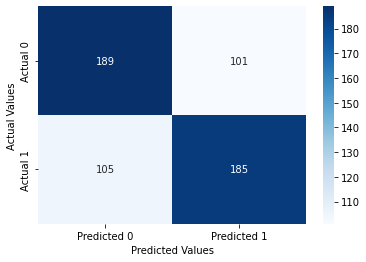

In [356]:
confusion_matrix_train(model4_cubic)

## Logistic Model for Fast Food

In [357]:
model5 = smf.logit('PCOS~fast_food', data = data).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.613514
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      578
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.1149
Time:                        17:37:16   Log-Likelihood:                -355.84
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 7.174e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0326      0.148     -6.999      0.000      -1.322      -0.743
fast_food      1.7468      0.191      9.139      0.000       1.372       2.121
==============================================================================
"""

<AxesSubplot:xlabel='fast_food', ylabel='PCOS'>

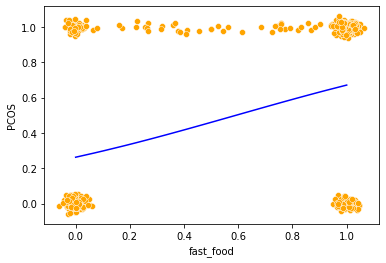

In [358]:
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(data.fast_food,0), y = jitter(data.PCOS,0), data = data, color = 'orange')
sns.lineplot(x = 'fast_food', y= model5.predict(data), data = data, color = 'blue') #Visualizing model

Classification accuracy = 68.1%


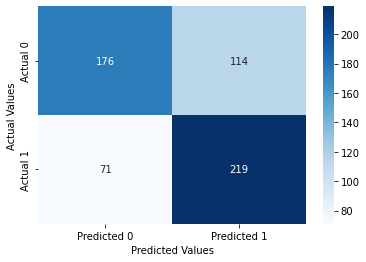

In [359]:
confusion_matrix_train(model5)

## Logistic Model for Hair Growth

In [360]:
model6 = smf.logit('PCOS~hair_growth', data = data).fit()
model6.summary()

Optimization terminated successfully.
         Current function value: 0.623439
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      578
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.1006
Time:                        17:37:18   Log-Likelihood:                -361.59
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 2.421e-19
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4638      0.101     -4.611      0.000      -0.661      -0.267
hair_growth     1.7972      0.217      8.265      0.000       1.371       2.223
===============================================================================
"""

<AxesSubplot:xlabel='hair_growth', ylabel='PCOS'>

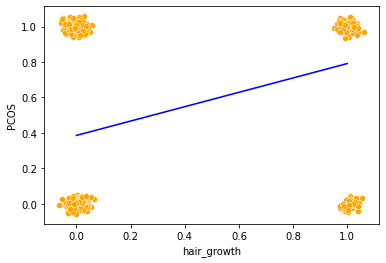

In [363]:
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(data.hair_growth,0), y = jitter(data.PCOS,0), data = data, color = 'orange')
sns.lineplot(x = 'hair_growth', y= model6.predict(data), data = data, color = 'blue') #Visualizing model

Classification accuracy = 66.4%


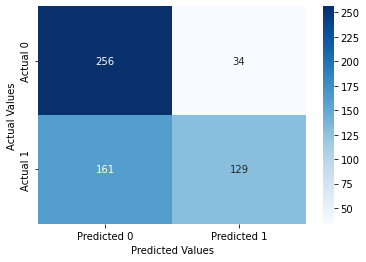

In [362]:
confusion_matrix_train(model6)

## Logistic Model for Cycle

In [145]:
model7 = smf.logit('PCOS~cycle', data = data).fit()
model7.summary()

Optimization terminated successfully.
         Current function value: 0.625355
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      578
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                 0.09780
Time:                        16:57:28   Log-Likelihood:                -362.71
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 7.455e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2677      0.281     -8.077      0.000      -2.818      -1.717
cycle          0.8695      0.105      8.295      0.000       0.664       1.075
==============================================================================
"""

<AxesSubplot:xlabel='cycle', ylabel='PCOS'>

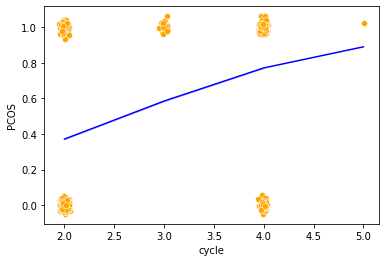

In [364]:
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(data.cycle,0), y = jitter(data.PCOS,0), data = data, color = 'orange')
sns.lineplot(x = 'cycle', y= model7.predict(data), data = data, color = 'blue') #Visualizing model

Classification accuracy = 69.3%


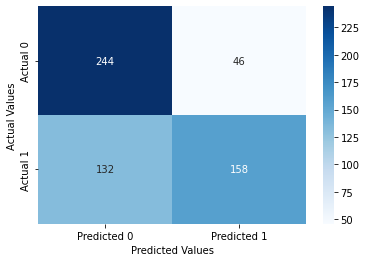

In [147]:
confusion_matrix_train(model7)

         Current function value: 0.589627
         Iterations: 35


-341.9834235795522

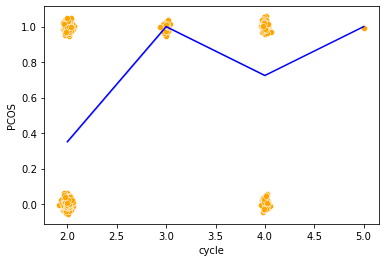

In [376]:
#Model with the cubic transformation of cycle
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(data.cycle,0), y = jitter(data.PCOS,0), data = data, color = 'orange')
model7_cubic = smf.logit(formula = 'PCOS~cycle+I(cycle**2)+I(cycle**3)', data = data).fit()
sns.lineplot(x = 'cycle', y= model7_cubic.predict(data), data = data, color = 'blue') 
model7_cubic.llf

**NOTE: Control for 1 outlier (or leverage point?) at cycle value of 5**

Classification accuracy = 69.3%


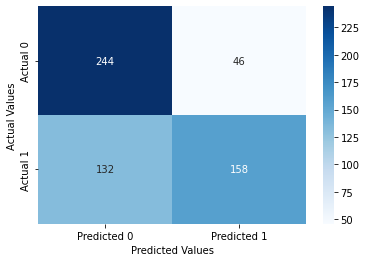

In [377]:
confusion_matrix_train(model7_cubic)

## Logistic Model for Pregnant 

In [148]:
model8 = smf.logit('PCOS~pregnant', data = data).fit()
model8.summary()

Optimization terminated successfully.
         Current function value: 0.685315
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      578
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                 0.01130
Time:                        16:58:48   Log-Likelihood:                -397.48
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                  0.002577
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1748      0.102      1.719      0.086      -0.024       0.374
pregnant      -0.5366      0.179     -2.996      0.003      -0.888      -0.186
==============================================================================
"""

<AxesSubplot:xlabel='pregnant', ylabel='PCOS'>

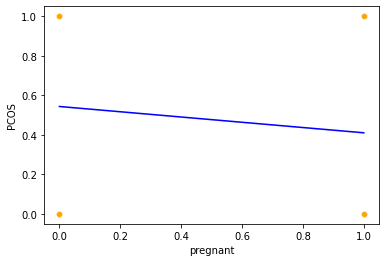

In [149]:
sns.scatterplot(x = 'pregnant', y = 'PCOS', data = data, color = 'orange') #Visualizing data
sns.lineplot(x = 'pregnant', y= model8.predict(data), data = data, color = 'blue') #Visualizing model

Classification accuracy = 55.9%


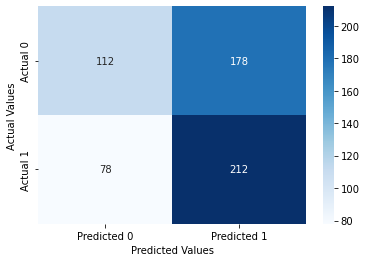

In [150]:
confusion_matrix_train(model8)

## Logistic Model for Marriage Years

In [317]:
model9 = smf.logit('PCOS~marriage_years', data = data).fit()
model9.summary()

Optimization terminated successfully.
         Current function value: 0.689505
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      578
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                0.005255
Time:                        17:27:52   Log-Likelihood:                -399.91
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                   0.03983
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2859      0.163      1.756      0.079      -0.033       0.605
marriage_years    -0.0381      0.019     -2.037      0.042      -0.075      -0.001
==================================================================================
"""

<AxesSubplot:xlabel='marriage_years', ylabel='PCOS'>

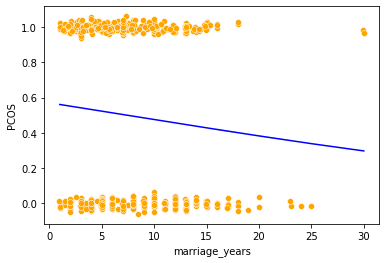

In [322]:
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(data.marriage_years,0), y = jitter(data.PCOS,0), data = data, color = 'orange')
sns.lineplot(x = 'marriage_years', y= model9.predict(data), data = data, color = 'blue') #Visualizing model

Classification accuracy = 55.2%


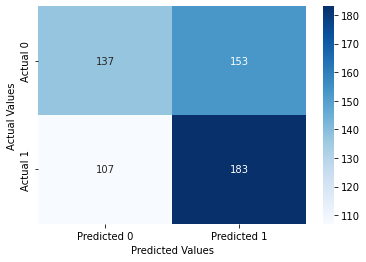

In [321]:
confusion_matrix_train(model9)

**Try a cubic tranformation of marriage years:**

Optimization terminated successfully.
         Current function value: 0.685194
         Iterations 4


-397.41227850034477

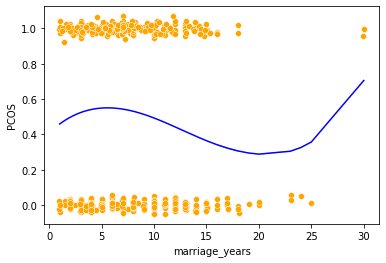

In [319]:
#Model with the cubic transformation of marriage years
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(data.marriage_years,0), y = jitter(data.PCOS,0), data = data, color = 'orange')
model9_cubic = smf.logit('PCOS~marriage_years+I(marriage_years**2)+I(marriage_years**3)', data = data).fit()
sns.lineplot(x = 'marriage_years', y= model9_cubic.predict(data), data = data, color = 'blue') 
model9_cubic.llf

Classification accuracy = 55.5%


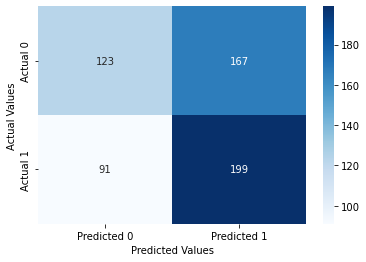

In [320]:
confusion_matrix_train(model9_cubic)

## Logistic Model with All Previous Predictors 

In [325]:
model10 = smf.logit(formula = 'PCOS~age+weight+BMI+fast_food+hair_growth+cycle+pregnant+marriage_years', data = data).fit()
model10.summary()

Optimization terminated successfully.
         Current function value: 0.513739
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      571
Method:                           MLE   Df Model:                            8
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.2588
Time:                        17:29:32   Log-Likelihood:                -297.97
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 1.245e-40
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.4167      0.969     -0.430      0.667      -2.316       1.483
age               -0.1024      0.027     -3.755      0.000      -0.156      -0.049
weight             0.0134      0.022      0.604      0.546      -0.030       0.057
BMI                0.0018      0.063      0.028      0.978      -0.121       0.124
fast_food          1.4404      0.220      6.557      0.000       1.010       1.871
hair_growth        1.1654      0.248      4.704      0.000       0.680       1.651
cycle              0.6386      0.120      5.336      0.000       0.404       0.873
pregnant          -0.6097      0.216     -2.818      0.005      -1.034      -0.186
marriage_years     0.0188      0.031      0.610      0.542      -0.042       0.079
==================================================================================
"""

Classification accuracy = 75.5%


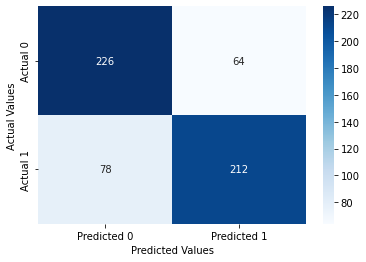

In [326]:
confusion_matrix_train(model10)

**The use of these multiple predictors increase accuracy to 75.5%**

## Adding Variable Interactions

**Try interacting fast_food & BMI, pregnant & marriage_years, and age & cycle**

In [438]:
model11 = smf.logit(formula = 'PCOS~age*cycle+weight+fast_food*BMI+hair_growth+pregnant+marriage_years', data = data).fit()
model11.summary()

Optimization terminated successfully.
         Current function value: 0.501929
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      569
Method:                           MLE   Df Model:                           10
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.2759
Time:                        17:50:09   Log-Likelihood:                -291.12
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 4.459e-42
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.9110      2.265      3.052      0.002       2.472      11.350
age               -0.2971      0.067     -4.426      0.000      -0.429      -0.166
cycle             -1.6483      0.698     -2.363      0.018      -3.015      -0.281
age:cycle          0.0736      0.022      3.272      0.001       0.029       0.118
weight             0.0157      0.023      0.685      0.493      -0.029       0.061
fast_food         -0.7335      1.447     -0.507      0.612      -3.570       2.103
BMI               -0.0557      0.071     -0.789      0.430      -0.194       0.083
fast_food:BMI      0.0896      0.060      1.502      0.133      -0.027       0.207
hair_growth        1.1237      0.252      4.465      0.000       0.630       1.617
pregnant          -0.6589      0.221     -2.984      0.003      -1.092      -0.226
marriage_years     0.0137      0.033      0.420      0.674      -0.050       0.078
==================================================================================
"""

Classification accuracy = 76.2%


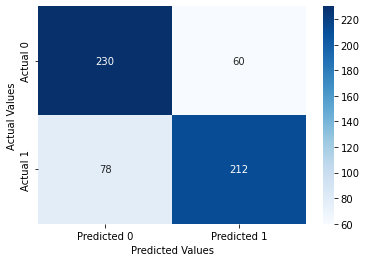

In [439]:
confusion_matrix_train(model11)

**Accuracy increased to 76.2% with 75 False Negatives**

In [452]:
model11 = smf.logit(formula = 'PCOS~age*cycle+fast_food*BMI+hair_growth+pregnant*marriage_years', data = data).fit()
model11.summary()

Optimization terminated successfully.
         Current function value: 0.502301
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   PCOS   No. Observations:                  580
Model:                          Logit   Df Residuals:                      569
Method:                           MLE   Df Model:                           10
Date:                Sun, 19 Feb 2023   Pseudo R-squ.:                  0.2753
Time:                        17:53:10   Log-Likelihood:                -291.33
converged:                       True   LL-Null:                       -402.03
Covariance Type:            nonrobust   LLR p-value:                 5.490e-42
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.8514      2.259      3.033      0.002       2.424      11.279
age                        -0.2918      0.067     -4.386      0.000      -0.422      -0.161
cycle                      -1.6113      0.694     -2.323      0.020      -2.971      -0.252
age:cycle                   0.0721      0.022      3.230      0.001       0.028       0.116
fast_food                  -0.8704      1.442     -0.604      0.546      -3.696       1.955
BMI                        -0.0194      0.046     -0.421      0.674      -0.109       0.071
fast_food:BMI               0.0957      0.060      1.609      0.108      -0.021       0.212
hair_growth                 1.1371      0.251      4.532      0.000       0.645       1.629
pregnant                   -0.7169      0.412     -1.740      0.082      -1.524       0.091
marriage_years              0.0081      0.038      0.214      0.831      -0.067       0.083
pregnant:marriage_years     0.0096      0.049      0.195      0.845      -0.087       0.106
===========================================================================================
"""

Classification accuracy = 77.1%


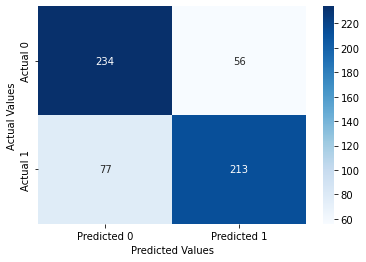

In [453]:
confusion_matrix_train(model11)

**Removed weight as it seems to be highly correlated with fast food. Added interaction between pregnancy & marriage_years. Accuracy increased to 77.1%**

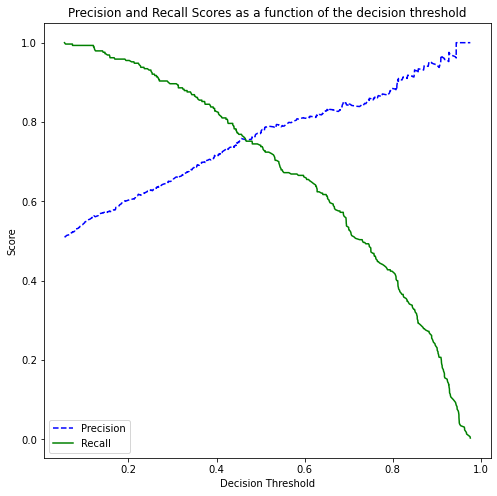

In [421]:
from sklearn.metrics import precision_recall_curve
y = data.PCOS
ypred = model11.predict(data)
p, r, thresholds = precision_recall_curve(y, ypred)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

**NOTE: Might not be relevant but just to see precision and recall (only recall considers False Negatives if that's what we're using as an accuracy measure) ^^**